<a href="https://colab.research.google.com/github/praiseolawoore/data-science/blob/main/Assessment_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Project
### Problem Statement

In the year 2013, a supermarket decided to draw insight from their data in order to make data driven decisions.
As a Data Analyst,you are presented with their 2013 daily sales records (sales_data.csv) and tasked to help them find answers to the questions below by analysing the data.

1. i. What is the average sales and profit per market? 

   ii.Plot a stacked bar chart showing the sales and profit per market.
   
   iii.Which market brings more sales on the average?

2. i. What are the best 10 performing products with regards to sales in 2013?

   ii.What are the least 10 performing products with regards to sales 2013?


3. i. Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?

   ii.Show the trend of profit from January to December with a line plot.

   iii. Which month does the company make more profit and what 5 products are sold most in that month?
   iv.  which day does the company make high sales on the average?

4. i. By analyzing the data, what is the correlation between sales and discount?

   ii. Use a scatter plot to show the relationship between sales and profit.

5. i. Plot a grouped bar chart showing the total profit for the different product category for each market.
   ii. From your graph, which product category performs well in each market?
   
6. i. Which customer spent the most in the whole year?
   ii. What product does the customer in (i) buy the most?
   iii. Which month did the customer spent the most?
   iv. How much did this customer spend in the whole year?
   
7. Can you do any other analysis to draw more insight? Feel free to do it.


**Thank you**

**GOOD LUCK!**





In [ ]:
# Use markdowns to write your answers or findings where necessary.
# Use comments to exlain you codes where necessary 
# Remember to import the necessary packages

### **NB**: To easily load the data, it's advisable you have the data and the notebook file  in the same folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import your packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import plotly.offline as po

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the sales data here
data = pd.read_csv('/content/drive/MyDrive/Datasets/sales_data.csv')
data['Order Date'] = pd.to_datetime(data['Order Date'], format = '%Y-%m-%d')

In [ ]:
data.head()

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624
1,1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700
2,2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472
3,3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060
4,4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.410


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13799 entries, 0 to 13798
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     13799 non-null  int64         
 1   Order Date     13799 non-null  datetime64[ns]
 2   Order ID       13799 non-null  object        
 3   Customer ID    13799 non-null  object        
 4   Customer Name  13799 non-null  object        
 5   Segment        13799 non-null  object        
 6   City           13799 non-null  object        
 7   Market         13799 non-null  object        
 8   Region         13799 non-null  object        
 9   Category       13799 non-null  object        
 10  Sub-Category   13799 non-null  object        
 11  Product Name   13799 non-null  object        
 12  Sales          13799 non-null  float64       
 13  Quantity       13799 non-null  int64         
 14  Discount       13799 non-null  float64       
 15  Profit         1379

In [ ]:
data = data.drop('Unnamed: 0', axis = 1)

# Data Analysis

## Question 1
### i. What is the average sales and profit per market?

In [ ]:
avsp = data.loc[:, ['Sales', 'Market', 'Profit']].groupby('Market').mean()

avsp

,Sales,Profit
Market,,
APAC,337.225210,42.596237
Africa,177.023796,20.623734
Canada,180.765566,48.391132
EMEA,156.453122,8.102479
EU,297.415215,38.373754
LATAM,198.738815,20.070383
US,235.842570,31.677105


* The Market with the highest sale on the average is **APAC** market
* The Market with the highest profit on the average is **Canada** market


### ii. Plot a stacked bar chart showing the sales and profit per market

Text(0.5, 0, 'Market')

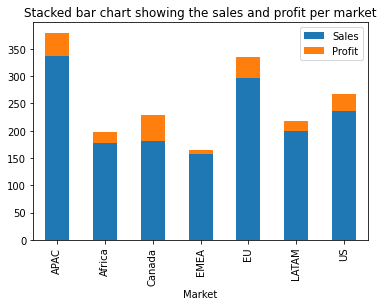

In [ ]:
avsp.plot(kind = 'bar', stacked = True)

plt.title("Stacked bar chart showing the sales and profit per market")
plt.xlabel('Market')

### iii. Which market brings more sales on the average?

## Question 2
### i. What are the best 10 performing products with regards to sales in 2013?

In [ ]:
data.groupby('Product Name')['Sales'].sum().sort_values(ascending = False).head(10)

Product Name
Motorola Smart Phone, Full Size                             29357.0982
Cisco Smart Phone, Full Size                                26737.1330
Canon imageCLASS 2200 Advanced Copier                       25899.9260
Harbour Creations Executive Leather Armchair, Adjustable    21871.1296
Apple Smart Phone, Full Size                                21120.4080
Hon Executive Leather Armchair, Adjustable                  20104.6026
Office Star Executive Leather Armchair, Adjustable          19936.1460
Nokia Smart Phone, with Caller ID                           18568.8543
Samsung Smart Phone, VoIP                                   16733.1120
Nokia Smart Phone, Full Size                                14765.8800
Name: Sales, dtype: float64

### ii. What are the least 10 performing products with regards to sales 2013?

In [ ]:
data.groupby('Product Name')['Sales'].sum().head(10)

Product Name
#10 Gummed Flap White Envelopes, 100/Box                24.780
#10 Self-Seal White Envelopes                           86.502
#10 White Business Envelopes,4 1/8 x 9 1/2             235.050
#10- 4 1/8" x 9 1/2" Security-Tint Envelopes            22.920
1.7 Cubic Foot Compact "Cube" Office Refrigerators    1248.960
12 Colored Short Pencils                                 4.160
12-1/2 Diameter Round Wall Clock                       111.888
14-7/8 x 11 Blue Bar Computer Printout Paper            96.080
24 Capacity Maxi Data Binder Racks, Pearl             1263.300
24-Hour Round Wall Clock                               127.872
Name: Sales, dtype: float64

All event happened in 2013 according to the dataset

# Question 3
### i. Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?

In [ ]:
data['Month'] = data['Order Date'].dt.month_name()
data['Day'] = data['Order Date'].dt.day_name()

In [ ]:
data.head(3)

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Day
0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624,January,Tuesday
1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700,January,Tuesday
2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472,January,Tuesday


In [ ]:
data.columns

Index(['Order Date', 'Order ID', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'Market', 'Region', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Month', 'Day'],
      dtype='object')

### ii. Show the trend of profit from January to December with a line plot

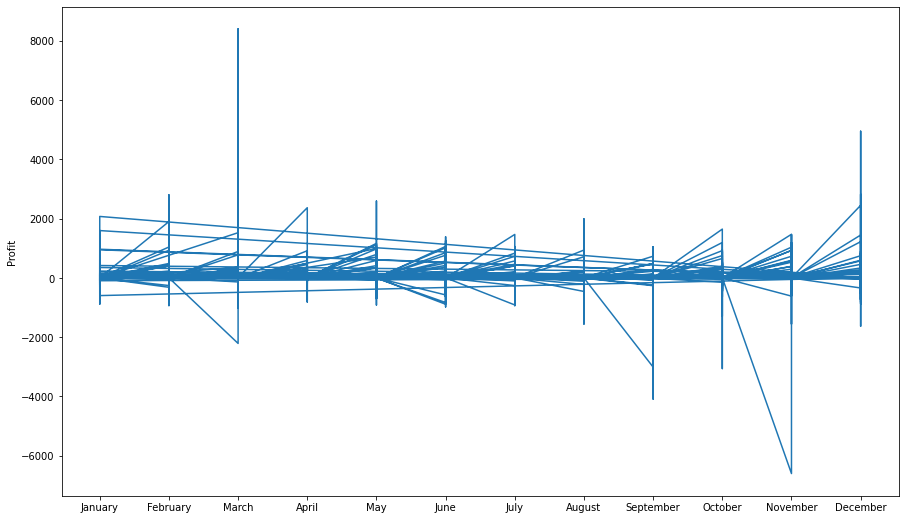

In [ ]:
plt.plot(data['Month'], data['Profit'])
plt.rcParams["figure.figsize"] = (15,9)
plt.ylabel("Profit")
plt.show()

### iii. Which month does the company make more profit and what 5 products are sold most in that month? 

In [ ]:
data.loc[:, ['Month', 'Profit']].groupby('Month').sum().sort_values(by = 'Profit', ascending = False).iloc[[0]]

,Profit
Month,
November,51720.88568


* The company made more profit in **November**

In [ ]:
ms = data[data['Month'] == 'November']
ms.groupby('Product Name')['Sales'].count().sort_values(ascending = False).head()

Product Name
Advantus Stacking Tray, Erganomic         5
Smead File Cart, Single Width             5
Office Star Steel Folding Chair, Black    5
OIC Staples, Assorted Sizes               5
Sanford Canvas, Blue                      4
Name: Sales, dtype: int64

* The above shows the first five most sold product in November

### iv. which day does the company make high sales on the average?

In [ ]:
data.loc[:, ['Day', 'Sales']].groupby('Day').mean().sort_values(by = 'Sales', ascending = False).iloc[[0]]

,Sales
Day,
Sunday,264.273374


* The company made average high sales on **Sunday**

## Question 4

### i. By analyzing the data, what is the correlation between sales and discount?

In [ ]:
data[['Sales', 'Discount']].corr()

,Sales,Discount
Sales,1.00000,-0.08471
Discount,-0.08471,1.00000


* The correlation between sales and discount is **-0.08471**

### ii. Use a scatter plot to show the relationship between sales and profit.

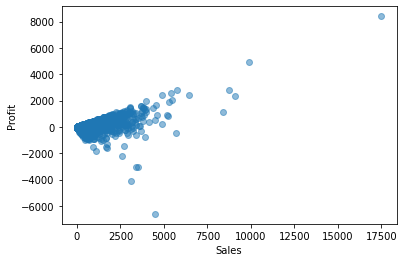

In [ ]:
plt.scatter(x = 'Sales', y = "Profit", data = data, alpha = 0.5)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

## Question 5
### i. Plot a grouped bar chart showing the total profit for the different product category for each market.

In [ ]:
mp = data.loc[:, ['Market', 'Category', 'Profit']].groupby(['Market', 'Category']).sum()
mp = pd.DataFrame(mp)

In [ ]:
mp.reset_index(inplace = True)

In [ ]:
mp.head()

,Market,Category,Profit
0,APAC,Furniture,40527.0294
1,APAC,Office Supplies,28955.4189
2,APAC,Technology,53620.6776
3,Africa,Furniture,5549.5200
4,Africa,Office Supplies,8941.5780


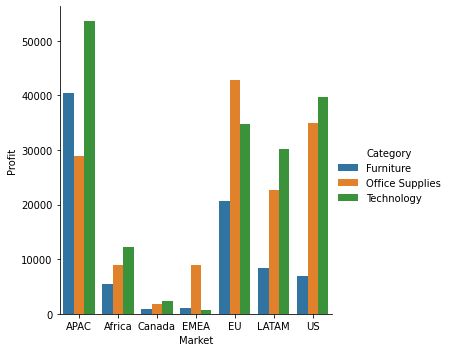

In [ ]:
sns.catplot(x = 'Market', y = 'Profit', hue = 'Category', data = mp, kind = 'bar')

### ii. From your graph, which product category performs well in each market?

* In **APAC** market, product category **Technology** performed well
* In **Africa** market, product category **Technology** performed well
* In **Canada** market, product category **Technology** performed well
* In **EMEA** market, product category **Office Supplies** performed well
* In **EU** market, product category **Office Supplies** performed well
* In **LATAM** market, product category **Technology** performed well
* In **US** market, product category **Technology** performed well

## Question 6
### i. Which customer spent the most in the whole year?

In [ ]:
data.groupby('Customer Name')['Sales'].sum().sort_values(ascending = False).iloc[[0]]

Customer Name
Tamara Chand    23190.408
Name: Sales, dtype: float64

* **Tamara Chand** spent the highest amount on sales 

### ii. What product does the customer in (i) buy the most?

In [ ]:
data.groupby(['Customer Name', 'Product Name'])['Sales'].sum().sort_values(ascending=False).iloc[[0]]

Customer Name  Product Name                         
Tamara Chand   Canon imageCLASS 2200 Advanced Copier    17499.95
Name: Sales, dtype: float64

* The customer buys **Canon imageCLASS 2200 Advanced Copier** most

### iii. Which month did the customer spent the most?

In [ ]:
ab = data[data['Customer Name'] == 'Tamara Chand']

ab.groupby('Month')['Sales'].sum().sort_values(ascending = False).iloc[[0]]

Month
March    18336.74
Name: Sales, dtype: float64

The month in which the company has most sales will also the month in which the customer spend most **(March)**

### iv. How much did this customer spend in the whole year?

In [ ]:
ab['Sales'].sum()

23190.408

The Total amount the customer spend in the year 2013 is **23190.408**

## Other Analysis

In [ ]:
data.head()

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Day
0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624,January,Tuesday
1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700,January,Tuesday
2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472,January,Tuesday
3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060,January,Tuesday
4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.410,January,Tuesday


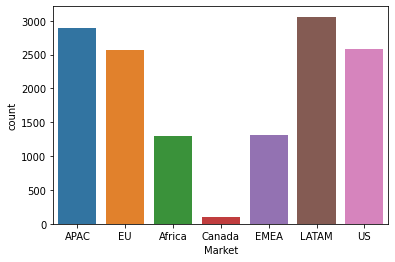

In [ ]:
sns.countplot(data['Market'])

People partronize **LATAM** market more than any other market

In [ ]:
#Top cities that has more sales
cs = data['City'].value_counts()[: 10]

fig = pe.bar(data,
            x = cs.index,
            y = cs.values,
            title = "Top  10 cities that has more sales",
            color = cs)

fig.show()

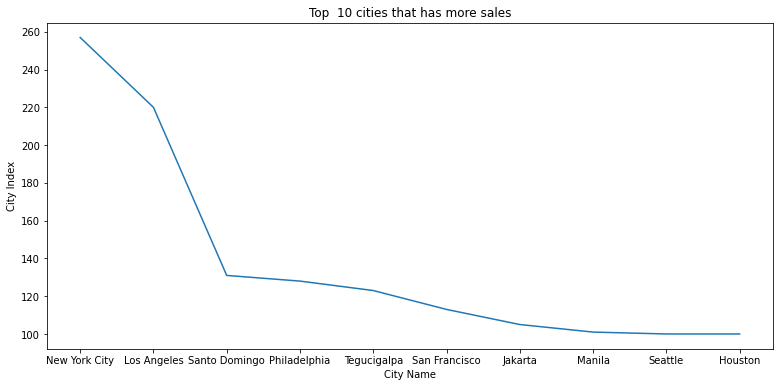

In [ ]:
# Alternative plot to the above plot if the above didn't work

plt.plot(data['City'].value_counts()[: 10])
plt.rcParams["figure.figsize"] = (13, 4)
plt.ylabel("City Index")
plt.xlabel("City Name")
plt.title("Top  10 cities that has more sales")
plt.show()

From the above plot we could see that the City with the highest sales is **New York**

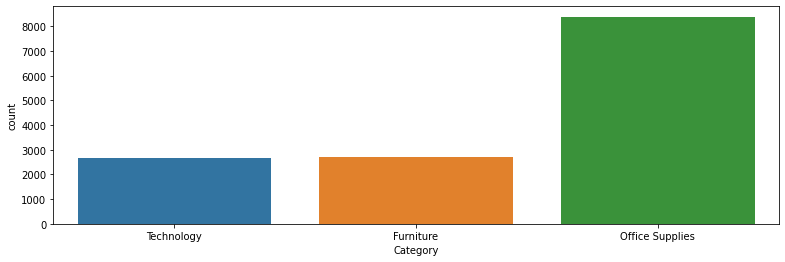

In [ ]:
sns.countplot(data['Category'])

* The category of Product bought mostly is **Office Supplies**

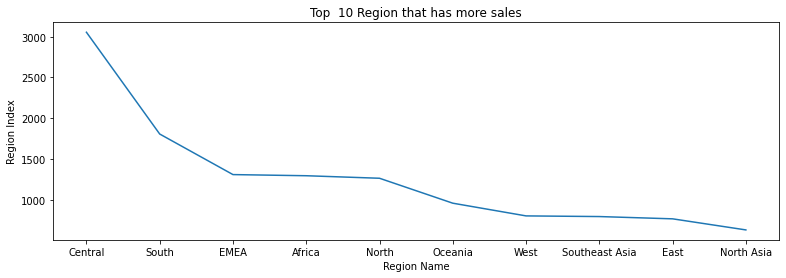

In [ ]:
plt.plot(data['Region'].value_counts()[: 10])
plt.rcParams["figure.figsize"] = (13, 4)
plt.ylabel("Region Index")
plt.xlabel("Region Name")
plt.title("Top  10 Region that has more sales")
plt.show()

The **Central** Region has most sales 

In [ ]:
cof = data[data['Category'] == 'Office Supplies']
cof.loc[:, ['Region', 'Category']].groupby('Region').count().head()

,Category
Region,
Africa,855
Canada,75
Caribbean,277
Central,1891
Central Asia,258


The **Central** Region is also the region in which **Office Supplies** are mostly bought 